In [2]:
import sys

import matplotlib.pyplot as plt
import numpy as np

In [3]:
sys.path.insert(0, "../src")

In [4]:
import imgfetcher
import greendetector

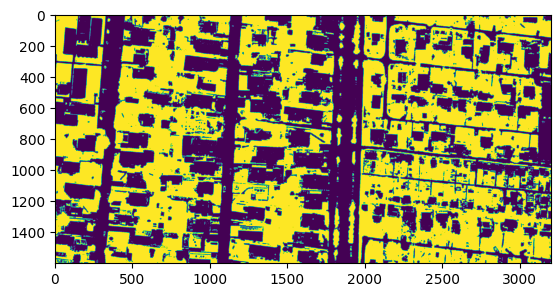

In [7]:
bbox = (725600, 6170800, 726000, 6171000)

im_size = (
    8 * (bbox[2] - bbox[0]),
    8 * (bbox[3] - bbox[1]),
)  # (width, height) approximately 8 pixels per meter as WMS resolution is 12.5 cm/pixel

layers=["geodanmark_2023_12_5cm_cir"]
mask = await greendetector.fetch_green_mask(bbox, im_size, layers=layers)

plt.imshow(GISimage)
plt.show()

In [6]:
GISimage

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

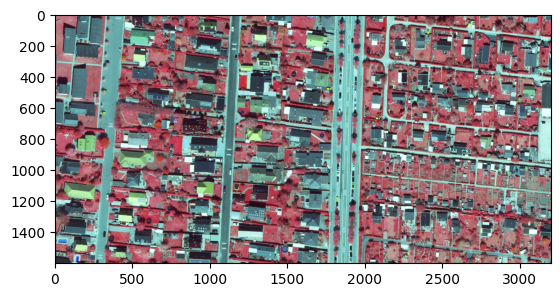

In [133]:
img = gis2np(GISimage)

plt.imshow(GISimage)
plt.show()

<Axes: >

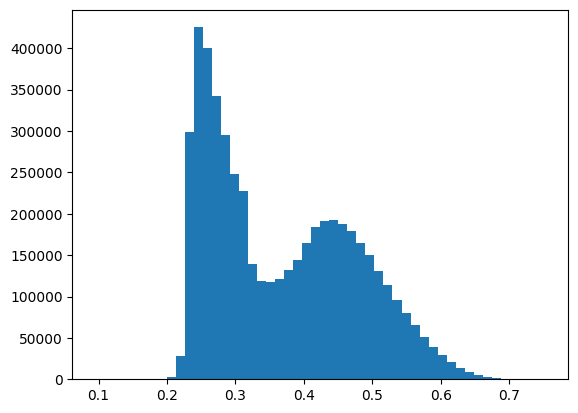

In [202]:
fig, ax = plt.subplots()
ax.hist(np.ravel(rel_channel1(img, threshold=0)), bins=50)
ax

## Comparison
### Simple threshold rel. size of channel 1

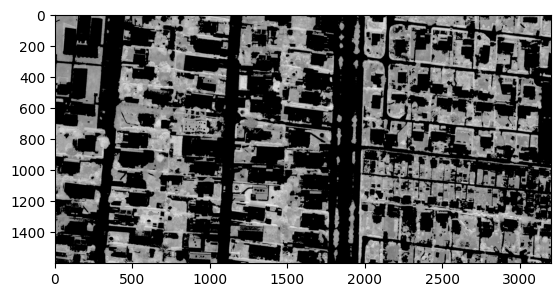

In [134]:
plt.imshow(rel_channel1(img, threshold=0.35), cmap="gray")

### Correlation with a target vector

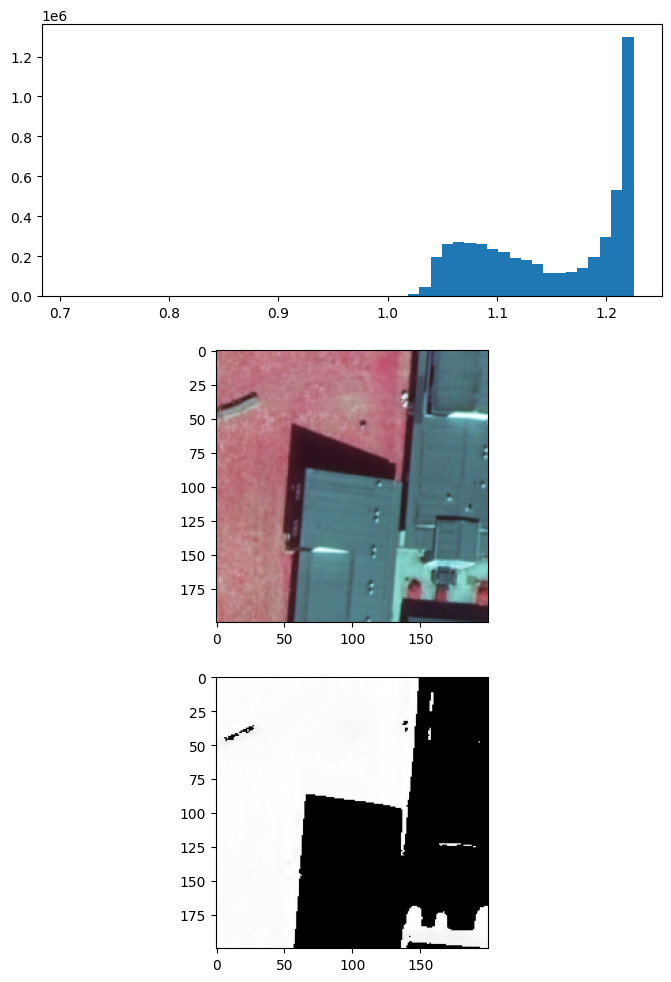

In [222]:
x_corr = corr(img)
y_corr = x_corr.copy()
y_corr[y_corr < 1.15] = 0
fig, axs = plt.subplots(3, 1, figsize=(8, 12))
axs[0].hist(np.ravel(x_corr), bins=50)
axs[1].imshow(img[0:200, 0:200, :])
axs[2].imshow(y_corr[0:200, 0:200], cmap="gray")

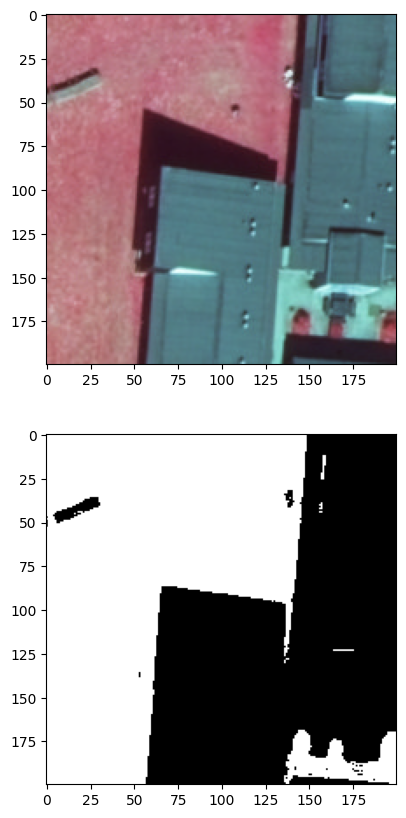

In [214]:
img_train = img[0:1000, 0:1000, :]
y_train = rel_channel1(img_train, threshold=0.35) > 0
svc = SVC(img_train, y_train)

y = predict_img(svc, img)

fig, axs = plt.subplots(2, 1, figsize=(8, 10))
axs[0].imshow(img[0:200, 0:200, :])
axs[1].imshow(y[0:200, 0:200], cmap="gray")